In [1]:
#import preprocessing and viz libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#for storing model
import pickle
print('...done importing!')

...done importing!


In [2]:
#read the data 
train_data = pd.read_excel("C:/Users/saket/Desktop/PROJECTS/airfare_prediction/Data_Train.xlsx")

In [3]:
#preview dataset
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
#deal with missing values
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
train_data.dropna(inplace=True)

In [6]:
#check data types of columns
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [7]:
#convert datetime objects to proper format
def converter(col):
    train_data[col] = pd.to_datetime(train_data[col])
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    converter(i)

In [8]:
#datatypes of columns converted
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [9]:
#train_data['j_day'] = train_data['Date_of_Journey'].dt.day
#train_data['j_month'] = train_data['Date_of_Journey'].dt.month
#train_data['j_year'] = train_data['Date_of_Journey'].dt.year
#now drop the original column
#train_data.drop('Date_of_Journey',axis=1,inplace=True)

### machine learning models dont understand datetime, so it has to be split into day, month and year

In [10]:
#split Date_of_Journey col into 3 separate columns
def datesplitter(df,col):
    df[col+'_day']=df[col].dt.day
    df[col+'_month']=df[col].dt.month
    df[col+'_year']=df[col].dt.year
    df.drop(col,axis=1,inplace=True)
datesplitter(train_data,"Date_of_Journey")

In [11]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_day,Date_of_Journey_month,Date_of_Journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-04-15 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-04-15 05:50:00,2021-04-15 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-04-15 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-04-15 18:05:00,2021-04-15 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-04-15 16:50:00,2021-04-15 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019


# notice that dep_time and arrival_time have today's date in their datetime format as date wasnt specified in the data. We however need only the time component from these two columns as we already got the date from date_pf_journey column

In [12]:
def timesplitter(df,col):
    df[col+'_hour']=df[col].dt.hour
    df[col+'_minute']=df[col].dt.minute
    df.drop(col,axis=1,inplace=True)
#function call
timesplitter(train_data,'Dep_Time')
timesplitter(train_data,'Arrival_Time')

In [13]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_day,Date_of_Journey_month,Date_of_Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35


In [14]:
#preprocessing the duration column
duration = list(train_data['Duration'])
for i in range(len(duration)):
    #print(i)
    #every i should be 2 units in length, when splitted along the white space, if not it means either h or m is missing
    #append 0h or 0m to such rows
    if len(duration[i].split(' '))==2:
        #print(duration[i])
        pass
    else:
        if 'h' in duration[i]:
            duration[i]=duration[i] +' 0m'
        else:
            duration[i]='0h '+duration[i]

train_data['Duration']=duration


In [15]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_day,Date_of_Journey_month,Date_of_Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35


In [16]:
#split duration column as duration_hr and min
def hour(x):
    return x.split(' ')[0][0:-1]

def minute(x):
    return x.split(' ')[1][0:-1]
train_data['Duration_hour']=train_data['Duration'].apply(hour)
train_data['Duration_minute']=train_data['Duration'].apply(minute)
train_data.drop('Duration',axis=1,inplace=True)

In [17]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date_of_Journey_day,Date_of_Journey_month,Date_of_Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45


In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Airline                10682 non-null  object
 1   Source                 10682 non-null  object
 2   Destination            10682 non-null  object
 3   Route                  10682 non-null  object
 4   Total_Stops            10682 non-null  object
 5   Additional_Info        10682 non-null  object
 6   Price                  10682 non-null  int64 
 7   Date_of_Journey_day    10682 non-null  int64 
 8   Date_of_Journey_month  10682 non-null  int64 
 9   Date_of_Journey_year   10682 non-null  int64 
 10  Dep_Time_hour          10682 non-null  int64 
 11  Dep_Time_minute        10682 non-null  int64 
 12  Arrival_Time_hour      10682 non-null  int64 
 13  Arrival_Time_minute    10682 non-null  int64 
 14  Duration_hour          10682 non-null  object
 15  Duration_minute    

In [19]:
###two new columns created are of object data type but we know that they are numerical entries. convert to type int'
train_data['Duration_hour'] = train_data['Duration_hour'].astype(int)
train_data['Duration_minute'] = train_data['Duration_minute'].astype(int)

In [20]:
##separate categorical and numerical columns now
cat_col = [col for col in train_data.columns if train_data[col].dtype == 'O']
num_col = [col for col in train_data.columns if train_data[col].dtype != 'O']

In [21]:
#make new df by name categoricals and view it
categoricals = train_data[cat_col]
categoricals.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [22]:
#check how many diff values for CAT COLUMNS  using value_counts() function
for i in categoricals.columns:
    print(i,len(categoricals[i].value_counts()))

Airline 12
Source 5
Destination 6
Route 128
Total_Stops 5
Additional_Info 10


In [23]:
#plot corr between prices and airlines 
#plt.figure(figsize=(15,6))
#plot = sns.boxplot(data=train_data.sort_values('Price',ascending=False),x='Airline',y='Price')
#plot.set_xticklabels(labels=, rotation=45)

### cat columns source and destination to be one hot encoded and airline, route to be label encoded
drop_first=True removes column with one so that data becomes smaller
###WE ARE DOING AND SAVING ALL CATEGORICAL ENCODING IN NEW DF 'train_data_dummies' 

In [24]:
#one hot encoding using pandas function on 2 columns
train_data_dummies = pd.get_dummies(train_data,columns=['Source','Destination'],drop_first=True)
train_data_dummies.head()

,Airline,Route,Total_Stops,Additional_Info,Price,Date_of_Journey_day,Date_of_Journey_month,Date_of_Journey_year,Dep_Time_hour,Dep_Time_minute,...,Duration_minute,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,...,50,0,0,0,0,0,0,0,0,1
1,Air India,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,2019,5,50,...,25,0,0,1,0,0,0,0,0,0
2,Jet Airways,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,2019,9,25,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,CCU → NAG → BLR,1 stop,No info,6218,5,12,2019,18,5,...,25,0,0,1,0,0,0,0,0,0
4,IndiGo,BLR → NAG → DEL,1 stop,No info,13302,3,1,2019,16,50,...,45,0,0,0,0,0,0,0,0,1


### route col can be encoded in two ways, way 1 is to directly apply labelencoding to route as it is. way 2 is to split the route based on '→'. using way 2 we get 5 columns, then apply label encoding to each column
### airline column to be label encoded normally

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
label_enc = LabelEncoder()
train_data_dummies['Route'] = label_enc.fit_transform(train_data_dummies['Route'])
train_data_dummies['Airline'] = label_enc.fit_transform(train_data_dummies['Airline'])
#drop additional_info  as it is unnecessary
train_data_dummies.drop('Additional_Info',axis=1,inplace=True)
train_data_dummies.head()

,Airline,Route,Total_Stops,Price,Date_of_Journey_day,Date_of_Journey_month,Date_of_Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,...,Duration_minute,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,3,18,non-stop,3897,24,3,2019,22,20,1,...,50,0,0,0,0,0,0,0,0,1
1,1,84,2 stops,7662,5,1,2019,5,50,13,...,25,0,0,1,0,0,0,0,0,0
2,4,118,2 stops,13882,6,9,2019,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,3,91,1 stop,6218,5,12,2019,18,5,23,...,25,0,0,1,0,0,0,0,0,0
4,3,29,1 stop,13302,3,1,2019,16,50,21,...,45,0,0,0,0,0,0,0,0,1


In [27]:
#to deal with total stops, we will use a dictonary to assign values to a number and then drop the original column
#train_data_dummies['Total_Stops'].unique()
dict={'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}
train_data_dummies['Total_Stops'] = train_data_dummies['Total_Stops'].map(dict)
#train_data_dummies.drop('Total_Stops',axis=1,inplace=True)
train_data_dummies.head()

,Airline,Route,Total_Stops,Price,Date_of_Journey_day,Date_of_Journey_month,Date_of_Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,...,Duration_minute,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,3,18,0,3897,24,3,2019,22,20,1,...,50,0,0,0,0,0,0,0,0,1
1,1,84,2,7662,5,1,2019,5,50,13,...,25,0,0,1,0,0,0,0,0,0
2,4,118,2,13882,6,9,2019,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,3,91,1,6218,5,12,2019,18,5,23,...,25,0,0,1,0,0,0,0,0,0
4,3,29,1,13302,3,1,2019,16,50,21,...,45,0,0,0,0,0,0,0,0,1


In [28]:
#we want to display all 22 columns, so set pandas 
pd.set_option('display.max_columns',22)
train_data_dummies.head(20)

,Airline,Route,Total_Stops,Price,Date_of_Journey_day,Date_of_Journey_month,Date_of_Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,3,18,0,3897,24,3,2019,22,20,1,10,2,50,0,0,0,0,0,0,0,0,1
1,1,84,2,7662,5,1,2019,5,50,13,15,7,25,0,0,1,0,0,0,0,0,0
2,4,118,2,13882,6,9,2019,9,25,4,25,19,0,0,1,0,0,1,0,0,0,0
3,3,91,1,6218,5,12,2019,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0
4,3,29,1,13302,3,1,2019,16,50,21,35,4,45,0,0,0,0,0,0,0,0,1
5,8,64,0,3873,24,6,2019,9,0,11,25,2,25,0,0,1,0,0,0,0,0,0
6,4,5,1,11087,3,12,2019,18,55,10,25,15,30,0,0,0,0,0,0,0,0,1
7,4,5,1,22270,3,1,2019,8,0,5,5,21,5,0,0,0,0,0,0,0,0,1
8,4,5,1,11087,3,12,2019,8,55,10,25,25,30,0,0,0,0,0,0,0,0,1
9,6,104,1,8625,27,5,2019,11,25,19,15,7,50,0,1,0,0,1,0,0,0,0


### Price is to be predicted, so we have to deal with outliers in this column of the train data set.


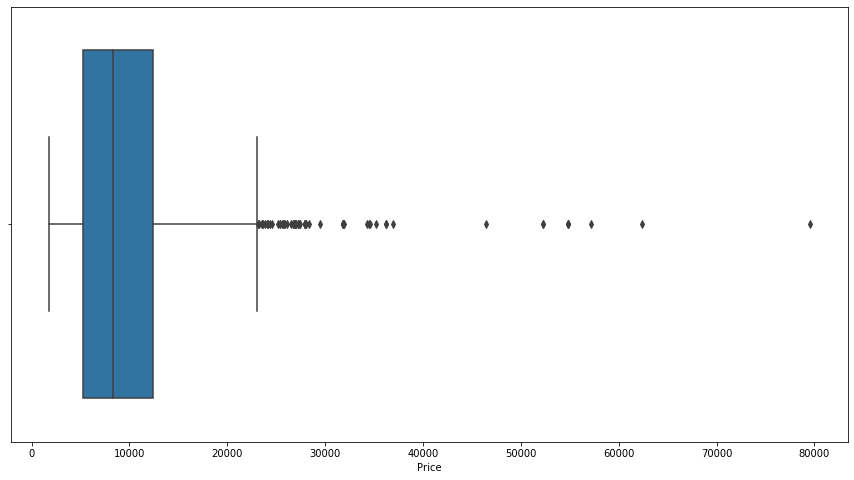

In [29]:
#dealing with outliers
def plot(df,col):
    #fig,(ax1,ax2)=plt.subplots(2,1)
    plt.figure(figsize=(15,8))
    sns.boxplot(df[col])
plot(train_data_dummies,'Price')

### Lets consider >40,000 to be outliers

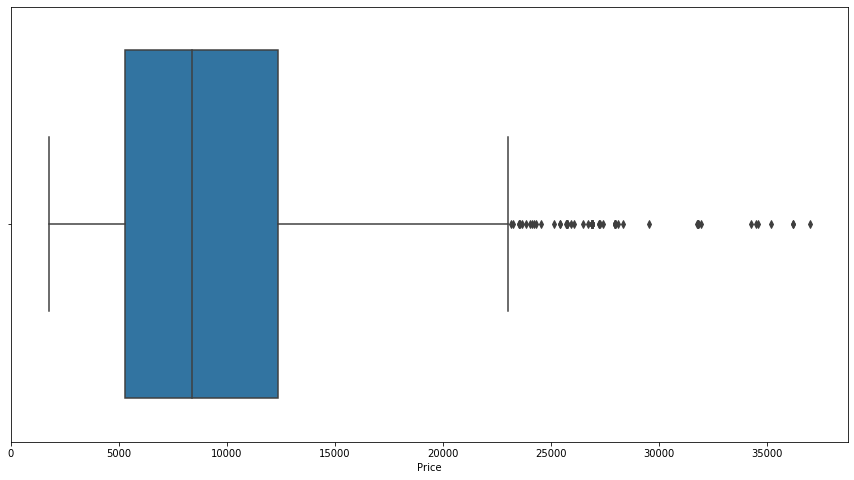

In [30]:
#replace outliers with median of data <40000
median1=train_data_dummies[train_data_dummies['Price']<40000]['Price'].median()
median2=train_data_dummies['Price'].median()

train_data_dummies['Price']=np.where(train_data_dummies['Price']>=40000,median1,train_data_dummies['Price'])

#plot barplot to check 
plot(train_data_dummies,'Price')

In [31]:
#now time to remove Price feature from the dataset

X= train_data_dummies.drop('Price',axis=1)
y = train_data_dummies['Price']

In [32]:
## feature selection
from sklearn.feature_selection import mutual_info_classif
mutual_info_classif(X,y)

array([2.59369278, 3.37225508, 2.18092159, 1.06804058, 0.82233673,
       1.38681157, 1.40371841, 1.22899031, 1.85634198, 1.55693207,
       1.77484984, 1.07651236, 0.17946412, 1.54202282, 0.88196973,
       0.31031597, 1.50452682, 0.42372359, 0.28293459, 0.18218014,
       0.38510292])

In [33]:
## create new dataframe which has columns and correspinding scores created above
importance = pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
#importance
importance.columns = ['importance']
importance.sort_values('importance',ascending=False)

,importance
Route,3.338768
Airline,2.588400
Total_Stops,2.170584
Arrival_Time_hour,1.826259
Duration_hour,1.787075
Source_Delhi,1.555931
Destination_Cochin,1.537116
Arrival_Time_minute,1.523040
Dep_Time_hour,1.436462
Date_of_Journey_year,1.401187


In [34]:
#imports
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [35]:
#split the train data and apply random forest regressor model
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.25)

In [36]:
### define a function to train the model

def predict(model):
    model1=model.fit(X_train,y_train)
    print("Training Score: {}".format(model1.score(X_train,y_train)))
    predictions=model1.predict(X_val)
    r2_score = metrics.r2_score(y_val,predictions)
    print("R2score is {}".format(r2_score))
    print("MAE is {}".format(metrics.mean_absolute_error(y_val,predictions)))
    rmse = np.sqrt(metrics.mean_squared_error(y_val,predictions))
    print("RMSE is {}".format(rmse))
    plt.figure(figsize=(12,6))
    sns.distplot(y_val-predictions)


Training Score: 0.9542350736652213
R2score is 0.8190306025754057
MAE is 1161.3586947652163
RMSE is 1895.976736237278


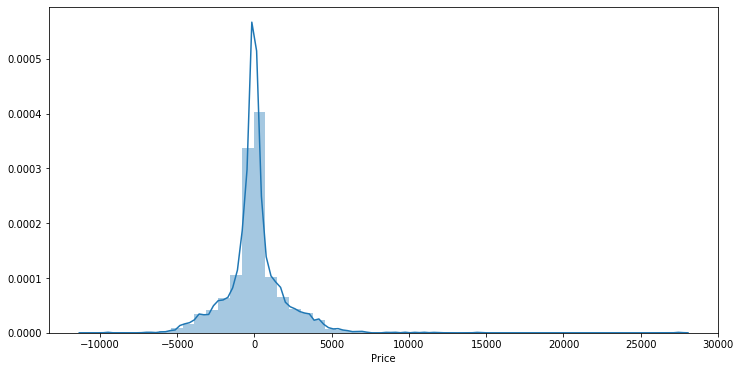

In [44]:
#call above function on RandomForestRegressor model
predict(RandomForestRegressor())

# Randomized Search CV for better Accuracy


### these are the default parameters set, we have to hyper tune them to achieve beeter accuracy
RandomForestRegressor()
n_estimators='warn',
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,

In [45]:
###set parameters to be included in cross validation for your model

n_estimators=[int(x) for x in np.linspace(100,1200,num=10)]
max_depth=[int(x) for x in np.linspace(5,30,num=5)]
params = {
    'n_estimators':n_estimators,
    'max_depth':max_depth,
    'max_features':['auto','sqrt'],
    'min_samples_split':[5,10,15,20,50,100]   
}

#initialize model to be used
model_used=RandomForestRegressor()

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Training Score: 0.8730300623115903
R2score is 0.8276948747847857
MAE is 1222.8068514633317
RMSE is 1850.033241564623


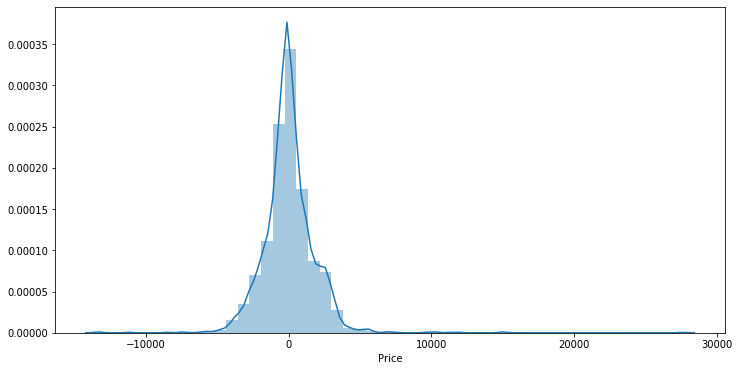

In [46]:
#import and initialize RScv
from sklearn.model_selection import RandomizedSearchCV
rf_model=RandomizedSearchCV(estimator=model_used,param_distributions=params,cv=3,verbose=2,n_jobs=-1)

#check 
predict(rf_model)


In [47]:
#show hypertuned features and use them in above model
rf_model.best_params_

{'n_estimators': 100,
 'min_samples_split': 20,
 'max_features': 'auto',
 'max_depth': 11}

### store model

In [41]:

file=open('C:/Users/saket/Desktop/PROJECTS/airfare_prediction/rf_random.pk1','wb')

In [42]:
pickle.dump(rf_model,file)

In [43]:

model1=file=open('C:/Users/saket/Desktop/PROJECTS/airfare_prediction/rf_random.pk1','rb')
pickle.load(model1)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 11, 17, 23, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 20, 50,
                                                              100],
                                        'n_estimators': [100, 222, 344, 466,
                                                         588, 711, 833, 955,
                                                         1077, 1200]},
                   verbose=2)